# **Lab 5: Insurance Costs**

## Part One: Data Exploration

In [248]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from plotnine import ggplot, aes, geom_point,geom_line, geom_histogram, geom_boxplot, geom_density, theme, theme_light, labs, geom_hline, scale_color_gradient, scale_fill_manual, element_text

In [249]:
# Load the dataset into a DataFrame
insurance_df = pd.read_csv('/content/insurance_costs.csv')

# Overview of the dataset
insurance_df.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.90,yes,southwest,16884.92
1,33,male,22.70,no,northwest,21984.47
2,32,male,28.88,no,northwest,3866.86
3,31,female,25.74,no,southeast,3756.62
4,60,female,25.84,no,northwest,28923.14


In [250]:
# Display summary statistics of the data
summary = insurance_df.describe(include='all')

summary

,age,sex,bmi,smoker,region,charges
count,431.00,431,431.00,431,431,431.00
unique,NaN,2,NaN,2,4,NaN
top,NaN,female,NaN,no,southeast,NaN
freq,NaN,225,NaN,344,125,NaN
mean,37.96,NaN,30.77,NaN,NaN,12297.10
std,16.36,NaN,6.11,NaN,NaN,11876.53
min,18.00,NaN,15.96,NaN,NaN,1131.51
25%,22.00,NaN,26.36,NaN,NaN,2710.44
50%,34.00,NaN,30.59,NaN,NaN,9866.30
75%,55.00,NaN,35.27,NaN,NaN,14510.87


In [251]:
# General Information of the dataset
insurance_info = insurance_df.info()
insurance_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      431 non-null    int64  
 1   sex      431 non-null    object 
 2   bmi      431 non-null    float64
 3   smoker   431 non-null    object 
 4   region   431 non-null    object 
 5   charges  431 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.3+ KB


In [252]:
# Checking for missing values
insurance_df.isnull().sum()

age        0
sex        0
bmi        0
smoker     0
region     0
charges    0
dtype: int64

In [253]:
# One-hot encoding for all the categorical variables
encoded_df = pd.get_dummies(insurance_df, columns=['sex', 'smoker', 'region'], drop_first=True)

encoded_df.head()

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,16884.92,0,1,0,0,1
1,33,22.70,21984.47,1,0,1,0,0
2,32,28.88,3866.86,1,0,1,0,0
3,31,25.74,3756.62,0,0,0,1,0
4,60,25.84,28923.14,0,0,1,0,0


Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

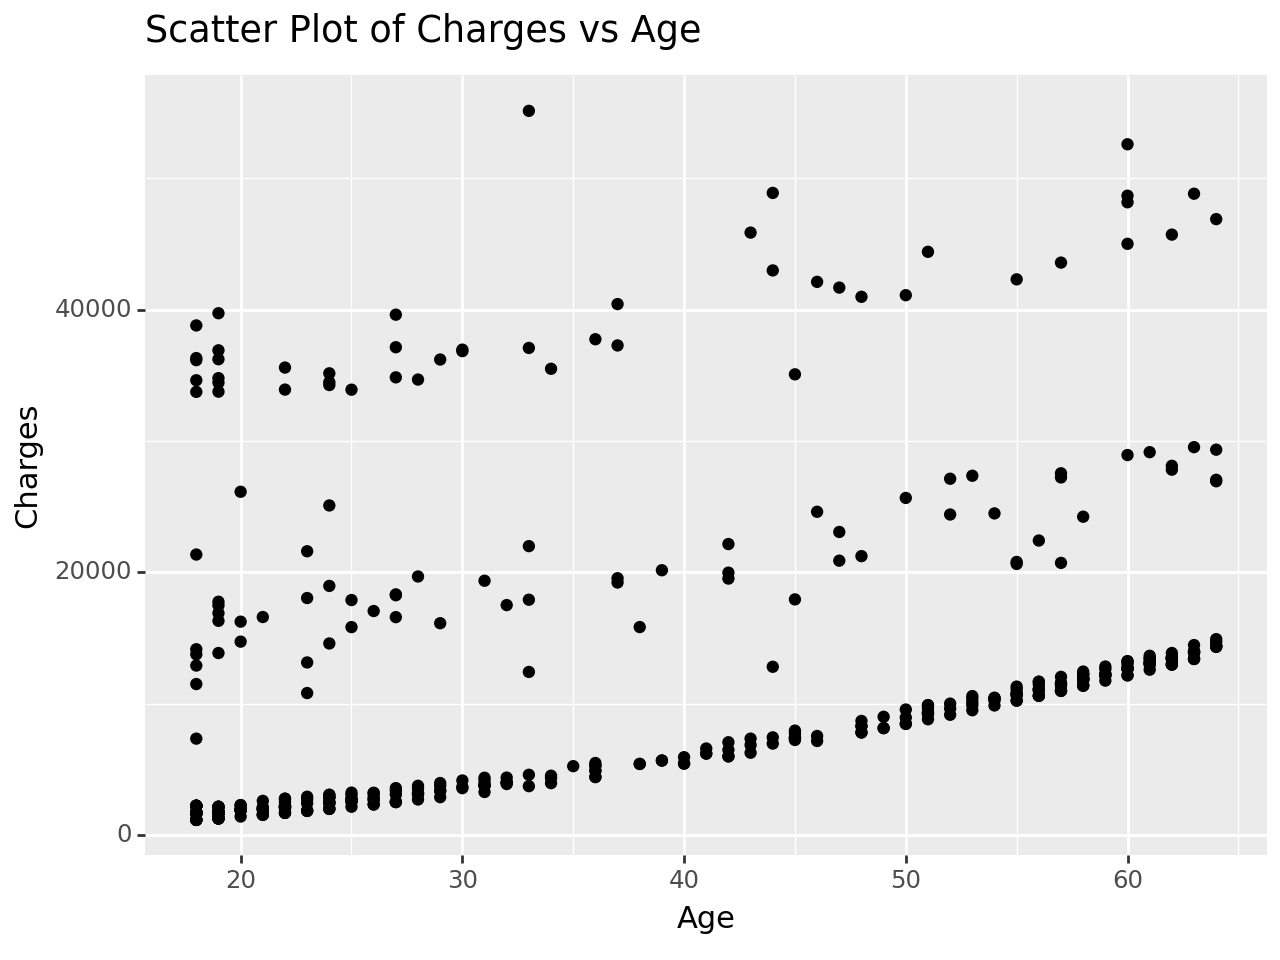

<Figure Size: (640 x 480)>

In [254]:
# scatter plot of charges vs age
scatter_plot = (ggplot(insurance_df, aes(x='age', y='charges'))
    + geom_point()
    + labs(title='Scatter Plot of Charges vs Age', x='Age', y='Charges')
)

scatter_plot

In this scatterplot, there is a positive correlation between age and charges, particularly noticeable as a general increase in charges with age. On average, older individuals are charged more than younger ones. The density of data points seems higher at the lower age spectrum, indicating that there may be more individuals in the dataset who are younger.

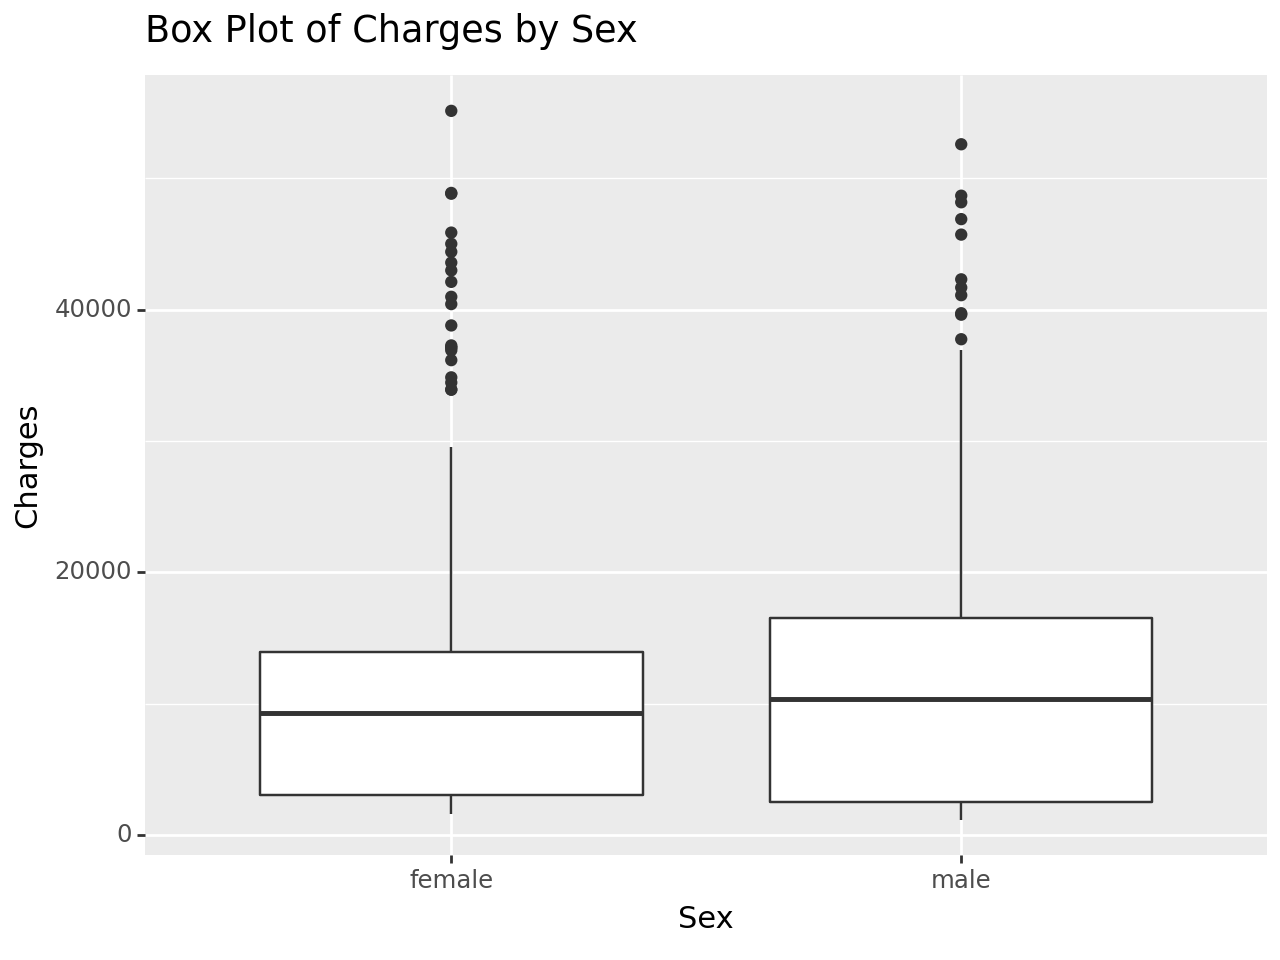

In [255]:
# boxplot of charges by sex
box_plot_sex = (ggplot(insurance_df, aes(x='sex', y='charges'))
    + geom_boxplot()
    + labs(title='Box Plot of Charges by Sex', x='Sex', y='Charges')
)

print(box_plot_sex)


In this boxplot, on average, the charges for males might be slightly higher than for females, there is a significant variability in charges within each sex category. The overall spread of charges is quite wide for both sexes, meaning there's a variation in the charges affecting both sexes.

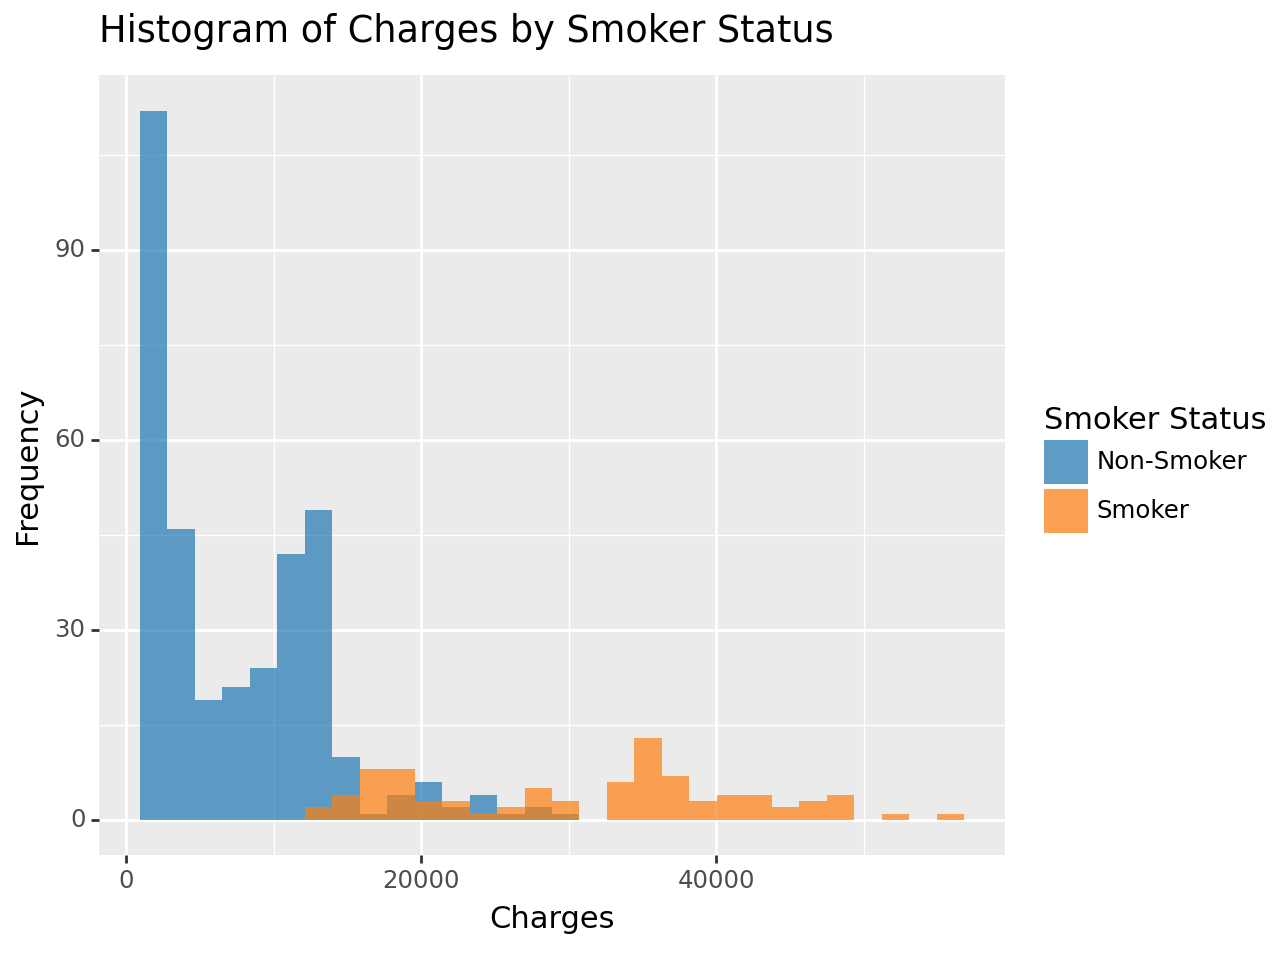

In [256]:

histogram_smoker = (ggplot(insurance_df, aes(x='charges', fill='smoker'))
    + geom_histogram(position='identity', alpha=0.7,bins=30)
    + labs(title='Histogram of Charges by Smoker Status', x='Charges', y='Frequency')
    + scale_fill_manual(values=["#1f77b4", "#ff7f0e"], name="Smoker Status", labels={"no": "Non-Smoker", "yes": "Smoker"})
)

print(histogram_smoker)


This histogram is shows that there is a relationship between smoking and higher medical charges, suggesting that smokers may face higher healthcare costs, potentially due to the health impacts of smoking.

## Part Two: Simple Linear Models

1. Construct a simple linear model to predict the insurance charges from the beneficiary's age. Discuss the model fit, and interpret the coefficient estimates.

In [257]:
X1 = insurance_df[['age']]
y1 = insurance_df['charges']

## Preprocessing: One-hot-encode
## Model 1 spec:  Linear Regression

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=80)

lr = LinearRegression()

my_pipeline1 = Pipeline(
    [('OLS', lr)])


fitted_pipeline = my_pipeline1.fit(X_train1, y_train1)

y_preds1 = fitted_pipeline.predict(X_test1)

X_test1['y_test'] = y_test1
X_test1['Y_pred'] = y_preds1

# finding the coefficients
fitted_pipeline.named_steps['OLS'].coef_

array([198.91096382])

For every additional year of age, the insurance charges are expected to increase by $198.91.

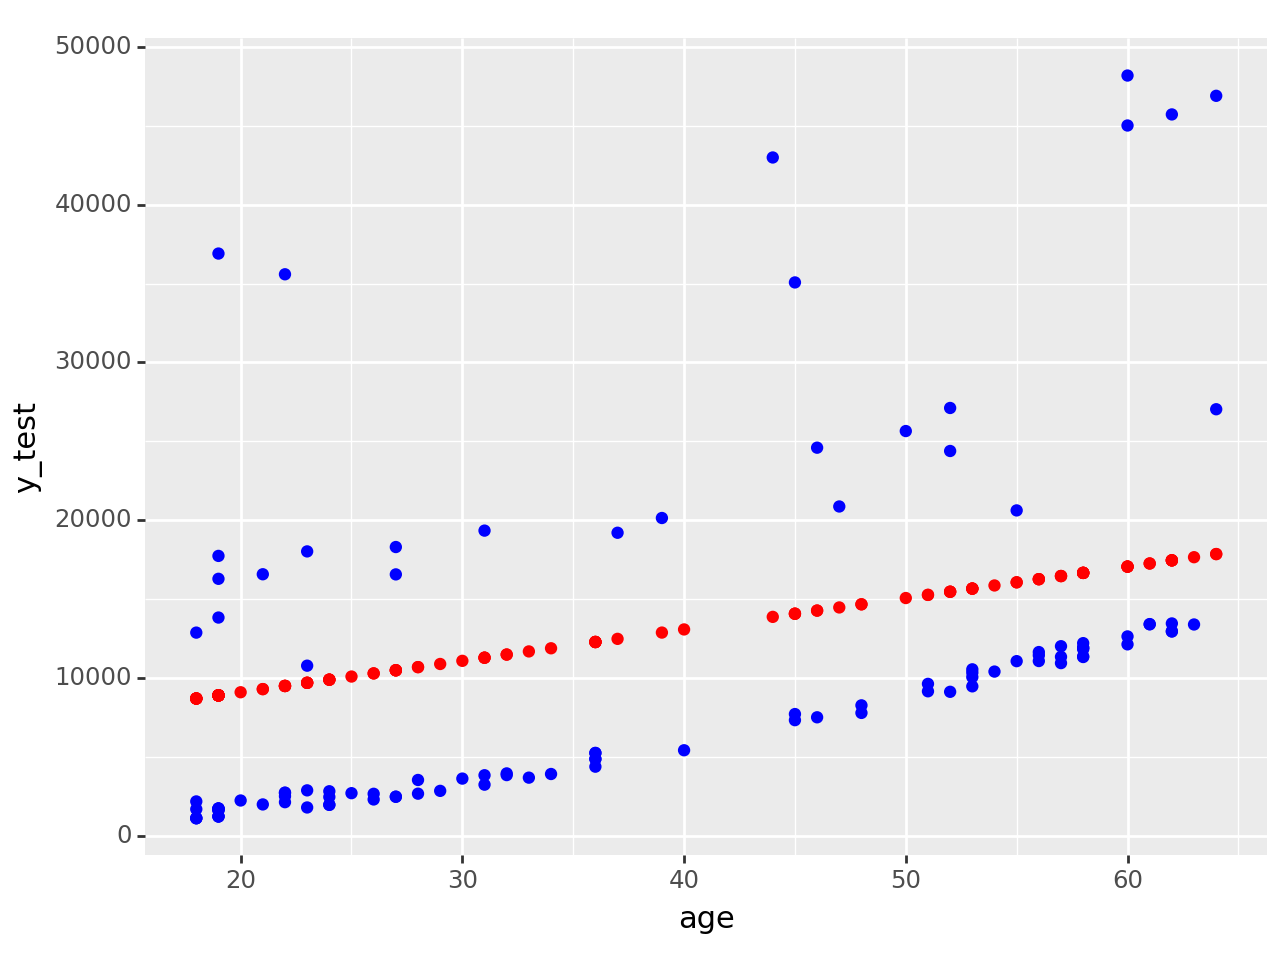

<Figure Size: (640 x 480)>

In [258]:
linear_regression_plot = (
    ggplot(X_test1, aes(x='age'))
    + geom_point(aes(y='y_test'), color = 'blue')
    + geom_point(aes(y='Y_pred'), color = 'red')
)

linear_regression_plot

This model seems to display a overall upward trend, but there seems to be considerable deviation from the fitted line, especially at the higher end of the age aspect. The model may be underfitting as it doesn't show the complexity of the data.

2. Make a model that also incorporates the variable sex. Report your results.

In [259]:
X2 = insurance_df[['age', 'sex']]
y2 = insurance_df['charges']

# Splitting the dataset into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=80)

# Define the OneHotEncoder and ColumnTransformer
enc = OneHotEncoder()
lr = LinearRegression()
ct = ColumnTransformer([("dummify_sex", enc, ['sex'])], remainder='passthrough')

# Create a pipeline that first transforms the 'sex' column and then applies the linear regression
my_pipeline = Pipeline([
    ('transform_column', ct),
    ('OLS', lr)])

# Fit the pipeline on the training data
pipeline = my_pipeline.fit(X_train2, y_train2)

# Predict on the test data
y_preds2 = pipeline.predict(X_test2)

X_test2['y_test2'] = y_test2
X_test2['Y_pred2'] = y_preds2

X_test2.head()

,age,sex,y_test2,Y_pred2
53,63,male,13405.39,18217.83
327,36,female,4889.04,11818.52
410,57,male,10959.33,17029.74
118,61,female,13415.04,16768.89
17,55,male,20630.28,16633.71


In [260]:
# reporting coefficient results
coefficients_model_2 = pipeline.named_steps['OLS'].coef_
print(f'Coefficients: {coefficients_model_2}')

Coefficients: [-526.45679577  526.45679577  198.01464018]


3. Now make a model that does not include sex, but does include smoker. Report your results.



In [261]:
# Splitting the dataset into predictors and response
X3 = insurance_df[['age', 'smoker']]
y3 = insurance_df['charges']

# Splitting the dataset into train and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=80)

# Define the OneHotEncoder and ColumnTransformer
enc = OneHotEncoder()
ct = ColumnTransformer([("dummify_smoker", enc, ['smoker'])], remainder='passthrough')

# Create a pipeline that first transforms the 'sex' column and then applies the linear regression
my_pipeline = Pipeline([
    ('transform_column', ct),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline on the training data
pipeline3 = my_pipeline.fit(X_train3, y_train3)

# Predict on the test data
y_preds3 = pipeline3.predict(X_test3)

X_test3['y_test3'] = y_test3
X_test3['Y_pred3'] = y_preds3

# Now you can print or inspect the comparison_df DataFrame
X_test3.head()

,age,smoker,y_test3,Y_pred3
53,63,no,13405.39,13284.99
327,36,no,4889.04,6965.84
410,57,no,10959.33,11880.74
118,61,no,13415.04,12816.91
17,55,no,20630.28,11412.65


In [262]:
# reporting coefficient results
coefficients_model_3 = pipeline3.named_steps['linear_regression'].coef_
print(f'Coefficients: {coefficients_model_3}')

Coefficients: [-12319.89842783  12319.89842783    234.04282402]


4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

In [263]:
# find the mean squared error
mse_sex = mean_squared_error(y_test2, y_preds2)
mse_smoker = mean_squared_error(y_test3, y_preds3)

# finding the r-squared
r_squared_sex = r2_score(y_test2, y_preds2)
r_squared_smoker = r2_score(y_test3, y_preds3)

print(f"MSE for Q2 model based on 'sex': {mse_sex}")
print(f"MSE for Q3 model based on 'smoker': {mse_smoker}")

print(f"R_squared for Q2 model based on 'sex': {r_squared_sex}")
print(f"R_squared for Q3 model based on 'smoker': {r_squared_smoker}")

MSE for Q2 model based on 'sex': 101040296.44936973
MSE for Q3 model based on 'smoker': 32310287.584017243
R_squared for Q2 model based on 'sex': 0.1642836265965706
R_squared for Q3 model based on 'smoker': 0.7327577480251427


Based on my results, the model from Q3 where age and smoker are the predictor variables better fits the data as the MSE is lower and R-squared is 0.733.

## Part Three: Multiple Linear Models




1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [264]:
# fitting a model that uses age and bmi as predictors
X4 = insurance_df[['age', 'bmi']]
y4 = insurance_df['charges']

## Preprocessing: One-hot-encode
## Model spec:  Linear Regression

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, random_state=80)

lr = LinearRegression()

my_pipeline4 = Pipeline(
    [('OLS', lr)])


fitted_pipeline = my_pipeline4.fit(X_train4, y_train4)

y_preds4 = fitted_pipeline.predict(X_test4)

X_test4['y_test'] = y_test4
X_test4['Y_pred'] = y_preds4
X_test4.head()

,age,bmi,y_test,Y_pred
53,63,41.47,13405.39,20621.58
327,36,29.92,4889.04,11971.25
410,57,23.70,10959.33,13850.41
118,61,21.09,13415.04,13753.78
17,55,37.30,20630.28,17820.03


In [265]:
# find the mean squared error of Model 1,4
mse_age = mean_squared_error(y_test1, y_preds1)
mse_age_bmi = mean_squared_error(y_test4, y_preds4)

# finding the r-squared of Model 1, 4
r_squared_age = r2_score(y_test1, y_preds1)
r_squared_age_bmi = r2_score(y_test4, y_preds4)

print(f"MSE for Q1 model based on 'age': {mse_age}")
print(f"MSE for Q4 model based on 'age','bmi': {mse_age_bmi}")

print(f"R_squared for Q1 model based on 'age': {r_squared_age}")
print(f"R_squared for Q4 model based on 'age','bmi': {r_squared_age_bmi}")

MSE for Q1 model based on 'age': 100381866.2512316
MSE for Q4 model based on 'age','bmi': 99634723.96036135
R_squared for Q1 model based on 'age': 0.1697295814944071
R_squared for Q4 model based on 'age','bmi': 0.17590928471860845


When comparing these 2 models, the model using 'age' and 'bmi' as predictor variables compared to the model in Part 2, Q1 has a lower MSE and a higher R squared and thus fares as the better model.

2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1.

In [266]:
# Fit a model that uses age and age^2 as predictors

insurance_df['age_squared'] = insurance_df['age'] ** 2

# fitting a model that uses age and age-squared as predictors
X5 = insurance_df[['age', 'age_squared']]
y5 = insurance_df['charges']


X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, random_state=80)

lr = LinearRegression()

my_pipeline = Pipeline(
    [('OLS', lr)])


fitted_pipeline = my_pipeline.fit(X_train5, y_train5)

y_preds5 = fitted_pipeline.predict(X_test5)

X_test5['y_test'] = y_test5
X_test5['Y_pred'] = y_preds5
X_test5.head()

,age,age_squared,y_test,Y_pred
53,63,3969,13405.39,16695.89
327,36,1296,4889.04,13254.59
410,57,3249,10959.33,16395.69
118,61,3721,13415.04,16625.32
17,55,3025,20630.28,16236.64


In [267]:
# find the mean squared error of Model 1,4
mse_age = mean_squared_error(y_test1, y_preds1)
mse_age_squared = mean_squared_error(y_test5, y_preds5)

# finding the r-squared of Model 1, 4
r_squared_age = r2_score(y_test1, y_preds1)
r_squared_age_squared = r2_score(y_test5, y_preds5)

print(f"MSE for Q1 model based on 'age': {mse_age}")
print(f"MSE for Q4 model based on 'age','bmi': {mse_age_squared}")

print(f"R_squared for Q1 model based on 'age': {r_squared_age}")
print(f"R_squared for Q4 model based on 'age','age-squared': {r_squared_age_squared}")

MSE for Q1 model based on 'age': 100381866.2512316
MSE for Q4 model based on 'age','bmi': 102318795.92354682
R_squared for Q1 model based on 'age': 0.1697295814944071
R_squared for Q4 model based on 'age','age-squared': 0.1537090045744265


When comparing these 2 models, the model using only 'age' as the predictor variable compared to the model using 'age' and 'age-squared' has a lower MSE and a higher R squared and thus fares as the better model.

3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [268]:
# Fit a model that uses age and age^2 as predictors

insurance_df['age_squared'] = insurance_df['age'] ** 2

# fitting a model that uses age and age-squared as predictors
X5 = insurance_df[['age']]
y5 = insurance_df['charges']

## Preprocessing:
## Model spec:  Linear Regression

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, random_state=80)

lr = LinearRegression()
ct = PolynomialFeatures(degree=4)


my_pipeline = Pipeline(
    [('Degree 4 Polynomial',ct),('OLS', lr)])


fitted_pipeline = my_pipeline.fit(X_train5, y_train5)

y_preds5 = fitted_pipeline.predict(X_test5)

X_test5['y_test'] = y_test5
X_test5['Y_pred'] = y_preds5
X_test5.head()

,age,y_test,Y_pred
53,63,13405.39,18289.79
327,36,4889.04,14556.04
410,57,10959.33,15051.31
118,61,13415.04,16669.36
17,55,20630.28,14811.13


In [269]:
# find the mean squared error of Model 1,4
mse_age = mean_squared_error(y_test1, y_preds1)
mse_age_squared = mean_squared_error(y_test5, y_preds5)

# finding the r-squared of Model 1, 4
r_squared_age = r2_score(y_test1, y_preds1)
r_squared_age_squared = r2_score(y_test5, y_preds5)

print(f"MSE for Q1 model based on 'age': {mse_age}")
print(f"MSE for Q4 model based on 'age','age-squared': {mse_age_squared}")

print(f"R_squared for Q1 model based on 'age': {r_squared_age}")
print(f"R_squared for Q4 model based on 'age','age-squared': {r_squared_age_squared}")

MSE for Q1 model based on 'age': 100381866.2512316
MSE for Q4 model based on 'age','age-squared': 100446429.1016928
R_squared for Q1 model based on 'age': 0.1697295814944071
R_squared for Q4 model based on 'age','age-squared': 0.16919557443840982


According to these results, there is not a huge difference between the two models, the model in P2 Q1 using only 'age' fares as the better model.





4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [270]:
# Fit a model that uses age and age^2 as predictors

insurance_df['age_squared'] = insurance_df['age'] ** 2

# fitting a model that uses age and age-squared as predictors
X5 = insurance_df[['age']]
y5 = insurance_df['charges']

## Preprocessing:
## Model spec:  Linear Regression

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5)

lr = LinearRegression()
ct = PolynomialFeatures(degree=12)


my_pipeline = Pipeline(
    [('Degree 12 Polynomial',ct),('OLS', lr)])

fitted_pipeline = my_pipeline.fit(X_train5, y_train5)

y_preds5 = fitted_pipeline.predict(X_test5)

In [271]:
# find the mean squared error of Model 1,5
mse_age = mean_squared_error(y_test1, y_preds1)
mse_age_squared = mean_squared_error(y_test5, y_preds5)

# finding the r-squared of Model 1, 5
r_squared_age = r2_score(y_test1, y_preds1)
r_squared_age_squared = r2_score(y_test5, y_preds5)

print(f"MSE for Q1 model based on 'age': {mse_age}")
print(f"MSE for model based on 'age','age-squared': {mse_age_squared}")

print(f"R_squared for Q1 model based on 'age': {r_squared_age}")
print(f"R_squared for model based on 'age','age-squared': {r_squared_age_squared}")

MSE for Q1 model based on 'age': 100381866.2512316
MSE for model based on 'age','age-squared': 114334077.39154013
R_squared for Q1 model based on 'age': 0.1697295814944071
R_squared for model based on 'age','age-squared': 0.10035375770605781


According to these results, the former model from P2 Q1 fares as the better model when compared to the model using 'age' and 'age-squared' fit onto a polynomial model of degree 12.

5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

When comparing all models using age one for the predictor variables, the model using 'age' and 'bmi' as its predictor variables for charges had the lowest MSE and the highest R squared and thus fares as the best model.

6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

In [272]:
# making predictions with both training and testing data
y_pred_train5 = my_pipeline.predict(X_train5)
y_pred_test5 = my_pipeline.predict(X_test5)

# find the mean squared error
mse_train5 = mean_squared_error(y_train5, y_pred_train5)
mse_test5 = mean_squared_error(y_test5, y_pred_test5)

In [274]:
df = pd.DataFrame({'age': X_test5['age'],'y_test5':y_test5, 'y_pred5': y_preds5})
df

,age,y_test5,y_pred5
5,25,2721.32,9325.17
298,54,10422.92,14415.64
144,18,1149.40,7536.81
110,50,8932.08,14474.70
217,64,14410.93,18834.86
...,...,...,...
201,61,13635.64,17048.44
332,24,34472.84,8900.79
41,20,2257.48,7785.51
117,19,13844.51,7639.74


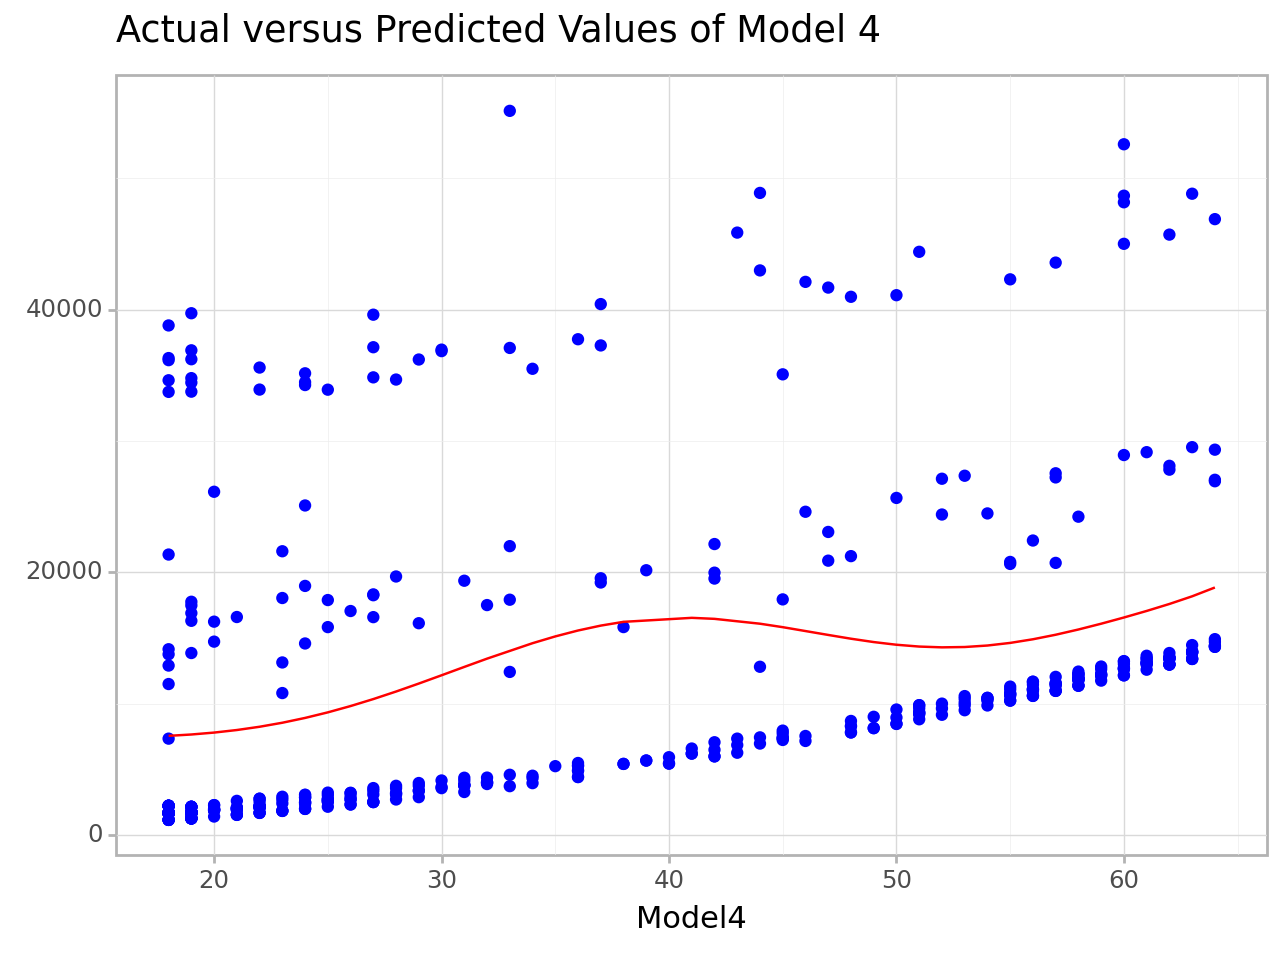

<Figure Size: (640 x 480)>

In [275]:


plot = (ggplot(insurance_df, aes(x='age', y = 'charges'))
    + geom_point(insurance_df, aes(y='charges'), color='blue')
    + geom_line(df, aes(y='y_pred5'), color='red')
    + labs(title='Actual versus Predicted Values of Model 4', x='Model4', y='')
    + theme_light())

plot

## Part Four: New data

In [217]:
# Load the new insurance dataset into a DataFrame
insurance_df2 = pd.read_csv('/content/insurance_costs_2.csv')

# Overview of the dataset
insurance_df2.head()

,age,sex,bmi,smoker,region,charges
0,23,male,34.40,no,southwest,1826.84
1,56,male,40.30,no,southwest,10602.39
2,18,male,34.10,no,southeast,1137.01
3,63,female,23.09,no,northeast,14451.84
4,63,male,28.31,no,northwest,13770.10


### Model 6: Original Insurance Dataset - Age, BMI, and Smoker as predictors (no interaction terms)

In [218]:
# defining X and y for ORIGINAL insurance df (predictor and dependent)
X6 = encoded_df[['age', 'bmi', 'smoker_yes']]
y6 = encoded_df['charges']

## Preprocessing: One-hot-encode
## Model spec:  Linear Regression

# splitting training and testing data from ORIGINAL insurance dataset
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, random_state=80)

lr = LinearRegression()

my_pipeline6 = Pipeline(
    [('OLS', lr)])

# fitting original training insurance dataset on pipeline
fitted_pipeline6 = my_pipeline6.fit(X_train6, y_train6)

# using the fitted pipeline from the original insurance df to predict on the original testing dataset
y_preds6 = fitted_pipeline6.predict(X_test6)

X_test6['y_test'] = y_test6
X_test6['Y_pred'] = y_preds6

# find the mse for Model 10
mse_model_6 = mean_squared_error(y_test6, y_preds6)
r_squared_model_6 = r2_score(y_test6, y_preds6)
coefficients_model_6 = fitted_pipeline.named_steps['OLS'].coef_


print(f"MSE for model 6 based on 'age','bmi' & 'smoker as the predictor variables while using the original insurance dataset to make predictions for the original insurance dataset': {mse_model_6}")
print(f"R_squared for model 6 based on 'age','bmi' & 'smoker as the predictor variable while using the original insurance dataset to make predictions for the original insurance dataset': {r_squared_model_6}")
print(f"Coefficients for model 6 based on 'age','bmi' & 'smoker as the predictor variable while using the original insurance dataset to make predictions for the original insurance dataset': {coefficients_model_6}")

MSE for model 6 based on 'age','bmi' & 'smoker as the predictor variables while using the original insurance dataset to make predictions for the original insurance dataset': 31343991.423827127
R_squared for model 6 based on 'age','bmi' & 'smoker as the predictor variable while using the original insurance dataset to make predictions for the original insurance dataset': 0.7407500991068955
Coefficients for model 6 based on 'age','bmi' & 'smoker as the predictor variable while using the original insurance dataset to make predictions for the original insurance dataset': [ 0.00000000e+00 -1.49166758e-05 -2.71212773e-09 -8.61318102e-07
 -1.42678915e-05 -1.70322615e-04 -1.13745634e-03  1.42549303e-04
 -7.26173703e-06  1.94529241e-07 -2.90227873e-09  2.29181830e-11
 -7.49358986e-14]


### Model 7: Original Insurance Dataset - Age, and BMI, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

In [219]:
# interaction terms
encoded_df['age_smoker'] = encoded_df['age'] * encoded_df['smoker_yes']
encoded_df['bmi_smoker'] = encoded_df['bmi'] * encoded_df['smoker_yes']

# Prepare the predictors and the response
X7 = encoded_df[['age', 'bmi', 'age_smoker', 'bmi_smoker']]
y7 = encoded_df['charges']

## Preprocessing:
## Model spec:  Linear Regression

X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, random_state=80)

lr = LinearRegression()

my_pipeline7 = Pipeline(
    [('OLS', lr)])

fitted_pipeline = my_pipeline7.fit(X_train7, y_train7)

y_preds7 = fitted_pipeline.predict(X_test7)

X_test7['y_test'] = y_test7
X_test7['Y_pred'] = y_preds7

mse_smoker_interaction = mean_squared_error(y_test7, y_preds7)
r_squared_smoker_interaction = r2_score(y_test7, y_preds7)
coefficients_model_7 = fitted_pipeline.named_steps['OLS'].coef_


print(f"MSE for model 7 based on 'age' and 'bmi' having an interaction with smoker: {mse_smoker_interaction}")
print(f"R_squared for model 7 based on 'age' and 'bmi' having an interaction with smoker: {r_squared_smoker_interaction}")
print(f"Coefficients for model 7 based on 'age' and 'bmi' having an interaction with smoker: {coefficients_model_7}")

MSE for model 7 based on 'age' and 'bmi' having an interaction with smoker: 24647223.29192602
R_squared for model 7 based on 'age' and 'bmi' having an interaction with smoker: 0.7961398690638795
Coefficients for model 7 based on 'age' and 'bmi' having an interaction with smoker: [ 262.98270486   88.73115883 -141.31200298  979.56351757]


### Model 8: Original Insurance Dataset - Age, BMI, & Smoker as predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

In [220]:
# Prepare the predictors and the response
X8 = encoded_df[['age', 'bmi', 'smoker_yes','age_smoker', 'bmi_smoker']]
y8 = encoded_df['charges']

## Preprocessing:
## Model spec:  Linear Regression

X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, random_state=80)

lr = LinearRegression()

my_pipeline8 = Pipeline(
    [('OLS', lr)])

fitted_pipeline = my_pipeline8.fit(X_train8, y_train8)

y_preds8 = fitted_pipeline.predict(X_test8)

X_test8['y_test'] = y_test8
X_test8['Y_pred'] = y_preds8

mse_model_8 = mean_squared_error(y_test8, y_preds8)
r_squared_model_8 = r2_score(y_test8, y_preds8)

coefficients_model_8 = fitted_pipeline.named_steps['OLS'].coef_


print(f"MSE for model 8 based on 'age', 'bmi', and 'smoker' as predictor variables having an interaction with smoker': {mse_model_8}")
print(f"R_squared for model 8 based on 'age', 'bmi', and 'smoker' as predictor variables having an interaction with smoker': {r_squared_model_8}")
print(f"Coeffificients for model 8 based on 'age', 'bmi', and 'smoker' as predictor variables having an interaction with smoker': {coefficients_model_8}")



MSE for model 8 based on 'age', 'bmi', and 'smoker' as predictor variables having an interaction with smoker': 21379608.111855652
R_squared for model 8 based on 'age', 'bmi', and 'smoker' as predictor variables having an interaction with smoker': 0.8231667049296548
Coeffificients for model 8 based on 'age', 'bmi', and 'smoker' as predictor variables having an interaction with smoker': [ 2.53052468e+02 -4.21120031e+00 -1.90532812e+04 -4.99377630e+01
  1.46940213e+03]


## Using the Fitted Model on the Original Data to Predict on the New Data

### Model 9: New Insurance Dataset - Only Age as the Predictor

In [221]:
#rerunning code to fit training data from original insurance df
fitted_pipeline1 = my_pipeline1.fit(X_train1, y_train1)

# defining X and y for new insurance df (predictor and dependent)
X9 = insurance_df2[['age']]
y9 = insurance_df2['charges']

## Preprocessing: One-hot-encode
## Model 1 spec:  Linear Regression

# splitting training and testing data from new insurance dataset
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, random_state=80)

lr = LinearRegression()

#my_pipeline = Pipeline([('OLS', lr)])

# using the fitted pipeline from the original insurance df to predict on the new tetsing dataset
y_preds9 = fitted_pipeline1.predict(X_test9)

X_test9['y_test'] = y_test9
X_test9['Y_pred'] = y_preds9

# find the mse for Model 8
mse_model_9 = mean_squared_error(y_test9, y_preds9)
r_squared_model_9 = r2_score(y_test9, y_preds9)


print(f"MSE for model 9 based on 'age' as the predictor variable using the original insurance dataset to make predictions for the new insurance dataset': {mse_model_8}")
print(f"R_squared for model 9 based on 'age' as the predictor variable using the original insurance dataset to make predictions for the new insurance dataset': {r_squared_model_8}")


MSE for model 9 based on 'age' as the predictor variable using the original insurance dataset to make predictions for the new insurance dataset': 21379608.111855652
R_squared for model 9 based on 'age' as the predictor variable using the original insurance dataset to make predictions for the new insurance dataset': 0.8231667049296548


### Model 10: New Insurance Dataset - Age & BMI as the Predictors

In [222]:
#rerunning code to fit training data from original insurance df
fitted_pipeline4 = my_pipeline4.fit(X_train4, y_train4)

# defining X and y for new insurance df (predictor and dependent)
X10 = insurance_df2[['age', 'bmi']]
y10 = insurance_df2['charges']

## Preprocessing: One-hot-encode
## Model 1 spec:  Linear Regression

# splitting training and testing data from new insurance dataset
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, random_state=80)

lr = LinearRegression()

#my_pipeline = Pipeline([('OLS', lr)])

# using the fitted pipeline from the original insurance df to predict on the new tetsing dataset
y_preds10 = fitted_pipeline4.predict(X_test10)

X_test10['y_test'] = y_test10
X_test10['Y_pred'] = y_preds10

# find the mse for Model 8
mse_model_10 = mean_squared_error(y_test10, y_preds10)
r_squared_model_10 = r2_score(y_test9, y_preds10)

print(f"MSE for model 10 based on 'age' & 'bmi' as the predictor variables while using the original insurance dataset to make predictions for the new insurance dataset': {mse_model_10}")
print(f"R_squared for model 10 based on 'age' & 'bmi' as the predictor variable while using the original insurance dataset to make predictions for the new insurance dataset': {r_squared_model_10}")


MSE for model 10 based on 'age' & 'bmi' as the predictor variables while using the original insurance dataset to make predictions for the new insurance dataset': 68821868.67535749
R_squared for model 10 based on 'age' & 'bmi' as the predictor variable while using the original insurance dataset to make predictions for the new insurance dataset': 0.012773371172750791


### Model 11: New Insurance Dataset - Age, BMI & Smoker Variables as the Predictors

In [223]:
# dummifying the dummy variables in the dataset
encoded_df2 = pd.get_dummies(insurance_df2, columns=['sex', 'smoker', 'region'], drop_first=True)

encoded_df2.head()

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,23,34.40,1826.84,1,0,0,0,1
1,56,40.30,10602.39,1,0,0,0,1
2,18,34.10,1137.01,1,0,0,1,0
3,63,23.09,14451.84,0,0,0,0,0
4,63,28.31,13770.10,1,0,1,0,0


In [224]:
#rerunning code to fit training data from original insurance df
fitted_pipeline6 = my_pipeline6.fit(X_train6, y_train6)

# defining X and y for new insurance df (predictor and dependent)
X11 = encoded_df2[['age', 'bmi', 'smoker_yes']]
y11 = encoded_df2['charges']

## Preprocessing: One-hot-encode
## Model spec:  Linear Regression

# splitting training and testing data from new insurance dataset
X_train11, X_test11, y_train11, y_test11 = train_test_split(X11, y11, random_state=80)

lr = LinearRegression()

#my_pipeline = Pipeline([('OLS', lr)])

# using the fitted pipeline from the original insurance df to predict on the new testing dataset
y_preds11 = fitted_pipeline6.predict(X_test11)

X_test11['y_test'] = y_test11
X_test11['Y_pred'] = y_preds11

# find the mse for Model 8
mse_model_11 = mean_squared_error(y_test11, y_preds11)
r_squared_model_11 = r2_score(y_test11, y_preds11)

print(f"MSE for model 11 based on 'age' & 'bmi' as the predictor variables while using the original insurance dataset to make predictions for the new insurance dataset: {mse_model_11}")
print(f"R_squared for model 11 based on 'age' & 'bmi' as the predictor variable while using the original insurance dataset to make predictions for the new insurance dataset: {r_squared_model_11}")



MSE for model 11 based on 'age' & 'bmi' as the predictor variables while using the original insurance dataset to make predictions for the new insurance dataset: 19487299.557686225
R_squared for model 11 based on 'age' & 'bmi' as the predictor variable while using the original insurance dataset to make predictions for the new insurance dataset: 0.7204612223182796


### Model 12: New Insurance Dataset - Age and BMI, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker) Variables as the Predictors

In [225]:
#rerunning code to fit training data from original insurance df
fitted_pipeline7 = my_pipeline7.fit(X_train7, y_train7)

# interaction terms
encoded_df2['age_smoker'] = encoded_df2['age'] * encoded_df2['smoker_yes']
encoded_df2['bmi_smoker'] = encoded_df2['bmi'] * encoded_df2['smoker_yes']

# Prepare the predictors and the response
X12 = encoded_df2[['age', 'bmi', 'age_smoker', 'bmi_smoker']]
y12 = encoded_df2['charges']

## Preprocessing:
## Model 12 spec:  Linear Regression

X_train12, X_test12, y_train12, y_test12 = train_test_split(X12, y12, random_state=80)

lr = LinearRegression()

my_pipeline = Pipeline(
    [('OLS', lr)])

# using the fitted pipeline from the original insurance df to predict on the new testing dataset
y_preds12 = fitted_pipeline7.predict(X_test12)

X_test12['y_test'] = y_test12
X_test12['Y_pred'] = y_preds12

mse_model_12 = mean_squared_error(y_test12, y_preds12)
r_squared_model_12 = r2_score(y_test12, y_preds12)

print(f"MSE for model 12 based on 'age' & 'bmi' as the predictor variables while using the original insurance dataset to make predictions for the new insurance dataset: {mse_model_12}")
print(f"R_squared for model 12 based on 'age' & 'bmi' as the predictor variable while using the original insurance dataset to make predictions for the new insurance dataset: {r_squared_model_12}")



MSE for model 12 based on 'age' & 'bmi' as the predictor variables while using the original insurance dataset to make predictions for the new insurance dataset: 11973574.162239539
R_squared for model 12 based on 'age' & 'bmi' as the predictor variable while using the original insurance dataset to make predictions for the new insurance dataset: 0.8282430936166469


### Model 13: New Insurance Dataset - Age, BMI, & 'Smoker' as predictors using the quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

In [226]:
#rerunning code to fit training data from original insurance df
fitted_pipeline8 = my_pipeline8.fit(X_train8, y_train8)

# Prepare the predictors and the response
X13 = encoded_df2[['age', 'bmi', 'smoker_yes','age_smoker', 'bmi_smoker']]
y13 = encoded_df2['charges']

## Preprocessing:
## Model spec:  Linear Regression

X_train13, X_test13, y_train13, y_test13 = train_test_split(X13, y13, random_state=80)

lr = LinearRegression()

my_pipeline = Pipeline(
    [('OLS', lr)])

# using the fitted pipeline from the original insurance df to predict on the new testing dataset
y_preds13 = fitted_pipeline8.predict(X_test13)

X_test13['y_test'] = y_test13
X_test13['Y_pred'] = y_preds13

mse_model_13 = mean_squared_error(y_test13, y_preds13)
r_squared_model_13 = r2_score(y_test13, y_preds13)

print(f"MSE for model 13 based on 'age' & 'bmi' as the predictor variables while using the original insurance dataset to make predictions for the new insurance dataset: {mse_model_13}")
print(f"R_squared for model 13 based on 'age' & 'bmi' as the predictor variable while using the original insurance dataset to make predictions for the new insurance dataset: {r_squared_model_13}")


MSE for model 13 based on 'age' & 'bmi' as the predictor variables while using the original insurance dataset to make predictions for the new insurance dataset: 9768084.909259014
R_squared for model 13 based on 'age' & 'bmi' as the predictor variable while using the original insurance dataset to make predictions for the new insurance dataset: 0.8598800974069016


In [227]:
# Set float format to avoid scientific notation, display as regular float with two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [228]:
# Creating the new model's predictions DataFrame
new_model_predictions_df = pd.DataFrame({
    'Model': ['9', '10', '11', '12', '13'],
    'MSE': [mse_model_9, mse_model_10, mse_model_11, mse_model_12, mse_model_13],
    'R_Squared': [r_squared_model_9, r_squared_model_10, r_squared_model_11, r_squared_model_12, r_squared_model_13]
})

# Sorting the new model's predictions DataFrame by MSE in ascending order
new_model_predictions_sorted_by_mse = new_model_predictions_df.sort_values(by='MSE', ascending=True)
new_model_predictions_sorted_by_mse

,Model,MSE,R_Squared
4,13,9768084.91,0.86
3,12,11973574.16,0.83
2,11,19487299.56,0.72
0,9,67567217.68,0.03
1,10,68821868.68,0.01


Based on each model's new predictions using the new insurance dataset, Model 13 which uses age, bmi, and smoker as its predictors, and both age and bmi  having an interaction term with smoker, has the lowest MSE value of 9768084.91 and the highest R_Squared value of 0.86. Thus, Model 13 is the best model to use.

### Plot Showing the Residuals of my Final Chosen Model


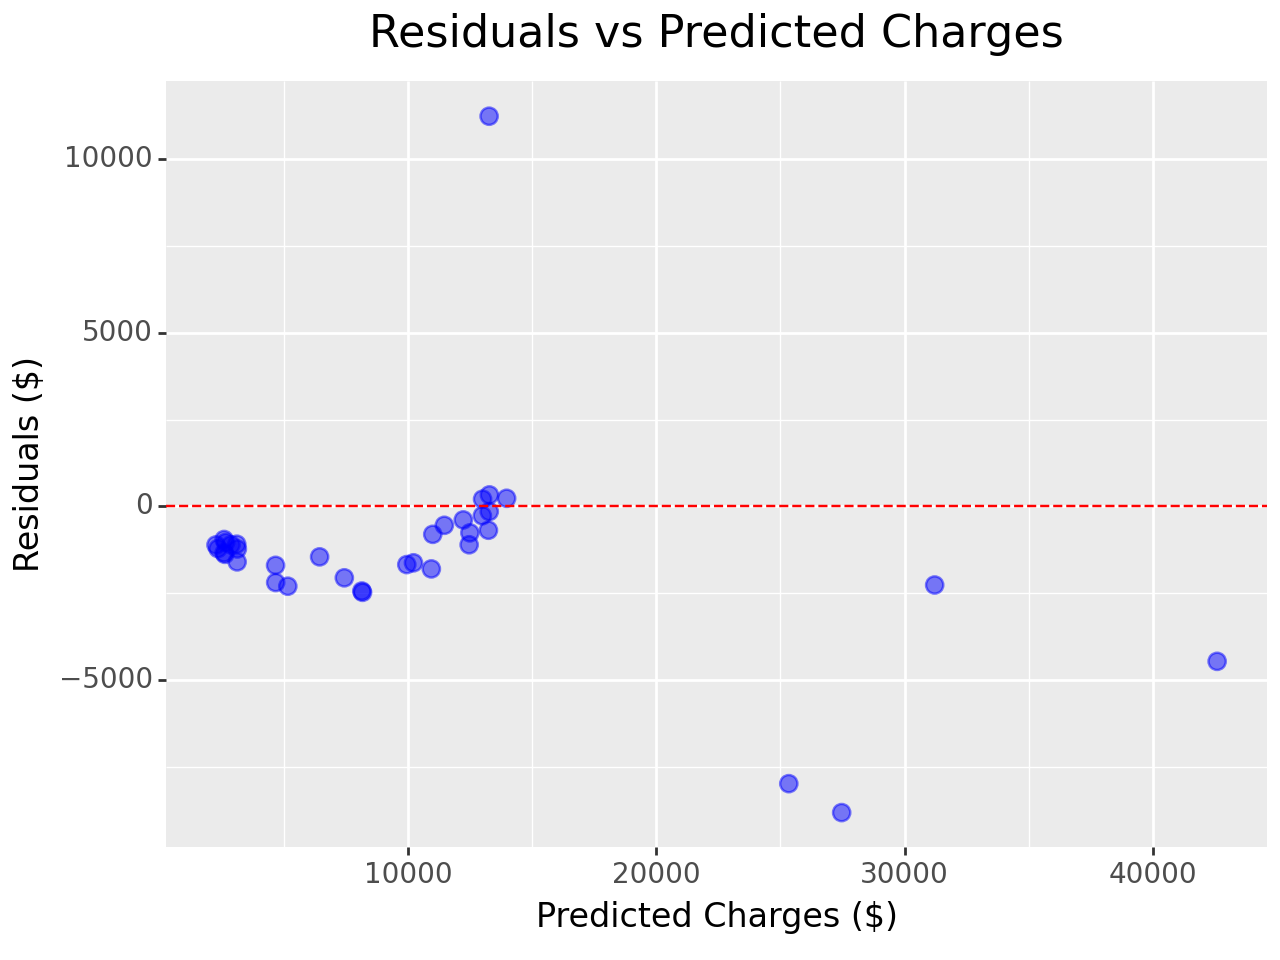

<Figure Size: (640 x 480)>

In [229]:
X_test13['Residuals'] = X_test13['y_test'] - X_test13['Y_pred']

# Create a residuals plot using plotnine
residuals_plot = (ggplot(X_test13, aes(x='Y_pred', y='Residuals'))

    + geom_point(alpha=0.5, color='blue', size=3)

    # Adding a horizontal line at zero for reference
    + geom_hline(yintercept=0, linetype='dashed', color='red')

    + labs(x='Predicted Charges ($)', y='Residuals ($)', title='Residuals vs Predicted Charges')

    + theme(plot_title=element_text(size=16, ha='center'), axis_title=element_text(size=12),axis_text=element_text(size=10)))

# Display the plot
residuals_plot

## Part Five: Full Exploration

In [230]:
# defining X and y for ORIGINAL insurance df (predictor and dependent)
X14 = encoded_df[['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
y14 = encoded_df['charges']

## Preprocessing: One-hot-encode
## Model 14 spec:  Linear Regression

# splitting training and testing data from ORIGINAL insurance dataset
X_train14, X_test14, y_train14, y_test14 = train_test_split(X14, y14, random_state=80)

lr = LinearRegression()
ct = PolynomialFeatures(degree=2)


my_pipeline14 = Pipeline(
    [('Degree 2 Polynomial',ct),('OLS', lr)])

fitted_pipeline14 = my_pipeline14.fit(X_train14, y_train14)

# defining X and y for new insurance df (predictor and dependent)
X15 = encoded_df2[['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
y15 = encoded_df2['charges']

## Preprocessing: One-hot-encode
## Model 15 spec:  Linear Regression

# splitting training and testing data from New insurance dataset
X_train15, X_test15, y_train15, y_test15 = train_test_split(X15, y15, random_state=80)

y_preds15 = fitted_pipeline14.predict(X_test15)

X_test15['y_test'] = y_test15
X_test15['Y_pred'] = y_preds15
X_test15.head()

# find the mse for Model 15
mse_model_15 = mean_squared_error(y_test15, y_preds15)
r_squared_model_15 = r2_score(y_test15, y_preds15)

print(f"MSE for quadratic model 15 based on 'sex','region' & 'smoker as the predictor variables while using the original insurance dataset to make predictions for the new insurance dataset': {mse_model_15}")
print(f"R_squared for quadratic model 15 based on 'sex','region' & 'smoker as the predictor variable while using the original insurance dataset to make predictions for the new insurance dataset': {r_squared_model_15}")



MSE for quadratic model 15 based on 'sex','region' & 'smoker as the predictor variables while using the original insurance dataset to make predictions for the new insurance dataset': 34941566.01946289
R_squared for quadratic model 15 based on 'sex','region' & 'smoker as the predictor variable while using the original insurance dataset to make predictions for the new insurance dataset': 0.49877495204237954


In [231]:
# defining X and y for ORIGINAL insurance df (predictor and dependent)
X16 = encoded_df[['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
y16 = encoded_df['charges']


# splitting training and testing data from ORIGINAL insurance dataset
X_train16, X_test16, y_train16, y_test16 = train_test_split(X16, y16, random_state=80)

lr = LinearRegression()
ct = PolynomialFeatures(degree=3)


my_pipeline16 = Pipeline(
    [('cubic',ct),('OLS', lr)])


fitted_pipeline16 = my_pipeline16.fit(X_train16, y_train16)

# defining X and y for new insurance df (predictor and dependent)
X17 = encoded_df2[['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
y17 = encoded_df2['charges']

# splitting training and testing data from NEW insurance dataset
X_train17, X_test17, y_train17, y_test17 = train_test_split(X17, y17, random_state=80)

# using OG df to predict on new df testing data
y_preds17 = fitted_pipeline16.predict(X_test17)

X_test17['y_test'] = y_test17
X_test17['Y_pred'] = y_preds17
X_test17.head()

# find the mse for Model 17
mse_model_17 = mean_squared_error(y_test17, y_preds17)
r_squared_model_17 = r2_score(y_test17, y_preds17)

print(f"MSE for cubic model 17 based on 'age','bmi' & 'smoker as the predictor variables while using the original insurance dataset to make predictions for the new insurance dataset': {mse_model_17}")
print(f"R_squared for cubic model 17 based on 'age','bmi' & 'smoker as the predictor variable while using the original insurance dataset to make predictions for the new insurance dataset': {r_squared_model_17}")



MSE for cubic model 17 based on 'age','bmi' & 'smoker as the predictor variables while using the original insurance dataset to make predictions for the new insurance dataset': 36299636.61876411
R_squared for cubic model 17 based on 'age','bmi' & 'smoker as the predictor variable while using the original insurance dataset to make predictions for the new insurance dataset': 0.47929388468307943


In [232]:
# defining X and y for ORIGINAL insurance df (predictor and dependent)
X18 = encoded_df[['age', 'bmi', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest', ]]
y18 = encoded_df['charges']

## Preprocessing: One-hot-encode
## Model spec:  Linear Regression

# splitting training and testing data from ORIGINAL insurance dataset
X_train18, X_test18, y_train18, y_test18 = train_test_split(X18, y18, random_state=80)

lr = LinearRegression()
ct = PolynomialFeatures(degree=2)


my_pipeline18 = Pipeline(
    [('Degree 2 Polynomial',ct),('OLS', lr)])


fitted_pipeline18 = my_pipeline18.fit(X_train18, y_train18)

# defining X and y for new insurance df (predictor and dependent)
X19 = encoded_df2[['age','bmi', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
y19 = encoded_df2['charges']


# splitting training and testing data from NEW insurance dataset
X_train19, X_test19, y_train19, y_test19 = train_test_split(X19, y19, random_state=80)

y_preds19 = fitted_pipeline18.predict(X_test19)

X_test19['y_test'] = y_test19
X_test19['Y_pred'] = y_preds19
X_test19.head()

# find the mse for Model 14
mse_model_19 = mean_squared_error(y_test19, y_preds19)
r_squared_model_19 = r2_score(y_test19, y_preds19)
#coefficients_model_6 = fitted_pipeline.named_steps['OLS'].coef_


print(f"MSE for model 19 based on 'age','bmi','smoker' and 'region' as the predictor variables while using the original insurance dataset to make predictions for the new insurance dataset': {mse_model_19}")
print(f"R_squared for model 19 based on 'age','bmi','smoker' and 'region' as the predictor variable while using the original insurance dataset to make predictions for the new insurance dataset': {r_squared_model_19}")



MSE for model 19 based on 'age','bmi','smoker' and 'region' as the predictor variables while using the original insurance dataset to make predictions for the new insurance dataset': 11667067.399543023
R_squared for model 19 based on 'age','bmi','smoker' and 'region' as the predictor variable while using the original insurance dataset to make predictions for the new insurance dataset': 0.8326398303498066


In [233]:
# defining X and y for ORIGINAL insurance df (predictor and dependent)
X20 = encoded_df[['age', 'bmi', 'smoker_yes', 'sex_male', 'age_smoker', 'bmi_smoker']]
y20 = encoded_df['charges']

## Preprocessing: One-hot-encode
## Model spec:  Linear Regression

# splitting training and testing data from ORIGINAL insurance dataset
X_train20, X_test20, y_train20, y_test20 = train_test_split(X20, y20, random_state=80)

lr = LinearRegression()
ct = PolynomialFeatures(degree=2)


my_pipeline20 = Pipeline(
    [('Degree 2 Polynomial',ct),('OLS', lr)])


fitted_pipeline20 = my_pipeline20.fit(X_train20, y_train20)

# defining X and y for new insurance df (predictor and dependent)
X21 = encoded_df2[['age','bmi', 'smoker_yes', 'sex_male', 'age_smoker', 'bmi_smoker']]
y21 = encoded_df2['charges']

## Preprocessing: One-hot-encode
## Model 15 spec:  Linear Regression

# splitting training and testing data from ORIGINAL insurance dataset
X_train21, X_test21, y_train21, y_test21 = train_test_split(X21, y21, random_state=80)

y_preds21 = fitted_pipeline20.predict(X_test21)

X_test21['y_test'] = y_test21
X_test21['Y_pred'] = y_preds21
X_test21.head()

# find the mse for Model 14
mse_model_21 = mean_squared_error(y_test21, y_preds21)
r_squared_model_21 = r2_score(y_test21, y_preds21)

print(f"MSE for model 21 based on 'sex','age','bmi' & 'smoker as the predictor variables while using the original insurance dataset to make predictions for the new insurance dataset': {mse_model_21}")
print(f"R_squared for model 21 based on 'sex','age','bmi' & 'smoker as the predictor variable while using the original insurance dataset to make predictions for the new insurance dataset': {r_squared_model_21}")



MSE for model 21 based on 'sex','age','bmi' & 'smoker as the predictor variables while using the original insurance dataset to make predictions for the new insurance dataset': 9309339.21696998
R_squared for model 21 based on 'sex','age','bmi' & 'smoker as the predictor variable while using the original insurance dataset to make predictions for the new insurance dataset': 0.8664606505363706


## Plotting the Residuals of my Final Chosen Model

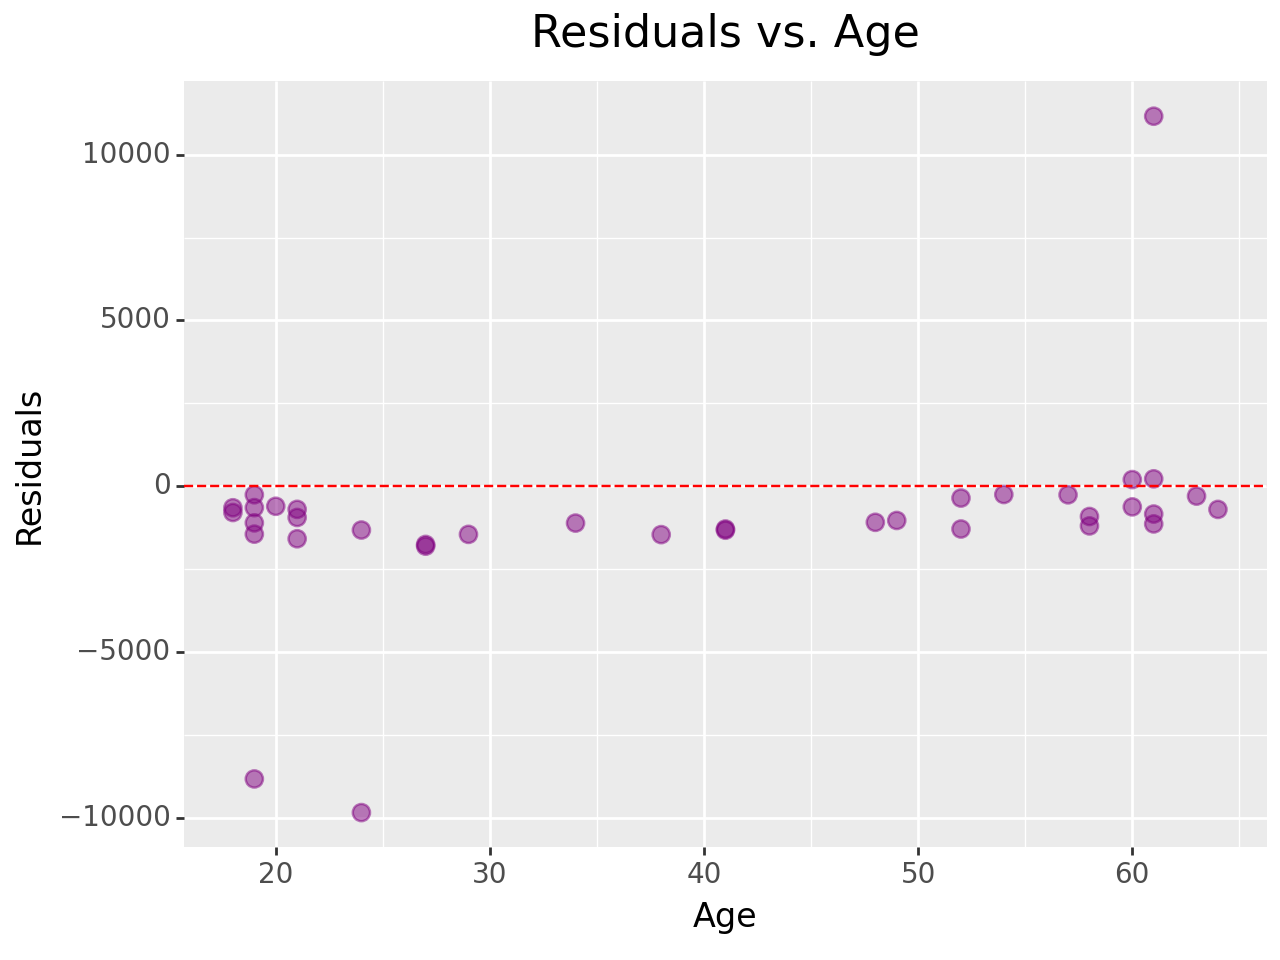

In [234]:
# Calculate residuals
X_test21['residuals'] = X_test21['y_test'] - X_test21['Y_pred']

# Plotting using plotnine
residual_plot = (ggplot(X_test21, aes(x='age', y='residuals'))
  + geom_point(alpha=0.5, color='purple', size=3)
  + geom_hline(yintercept=0, color='red', linetype='dashed')
  + labs(title='Residuals vs. Age',x='Age',y='Residuals')
  + theme(plot_title=element_text(size=16, ha='center'), axis_title=element_text(size=12),axis_text=element_text(size=10))
)

print(residual_plot)

**My final chosen model that best predicts the insurance charges using the original insurance dataset to train and the new insurance dataset to predict is model 21 where I used age, BMI, smoker, and the interaction terms between age-smoker and bmi-smoker. The reported MSE score for this model was 9309339.22 while the R-squared found was 0.87.**